<a href="https://colab.research.google.com/github/Lkoushik29/SpamEmail/blob/main/spam_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
from google.colab import files
upload = files.upload()

Saving spam.csv to spam.csv


In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Label distribution (%): ham     86.6
spam    13.4
Name: Category, dtype: float64


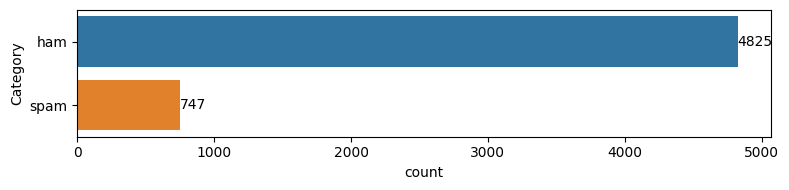

In [7]:
print('Label distribution (%):', round(df.Category.value_counts(normalize=True),3)*100)
plt.figure(figsize=(8,2))
ax=sns.countplot(data=df, y='Category')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()

In [8]:
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df['Length']=df['Text'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import plotly.express as px
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [11]:
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [13]:
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(3900, 8672)

'X-Test :'

(1672, 8672)

'Y-Train :'

(3900,)

'X-Test :'

(1672,)

MLPClassifier

In [14]:
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.98
Precision score: 0.98
Recall score: 0.90
F1 score: 0.94


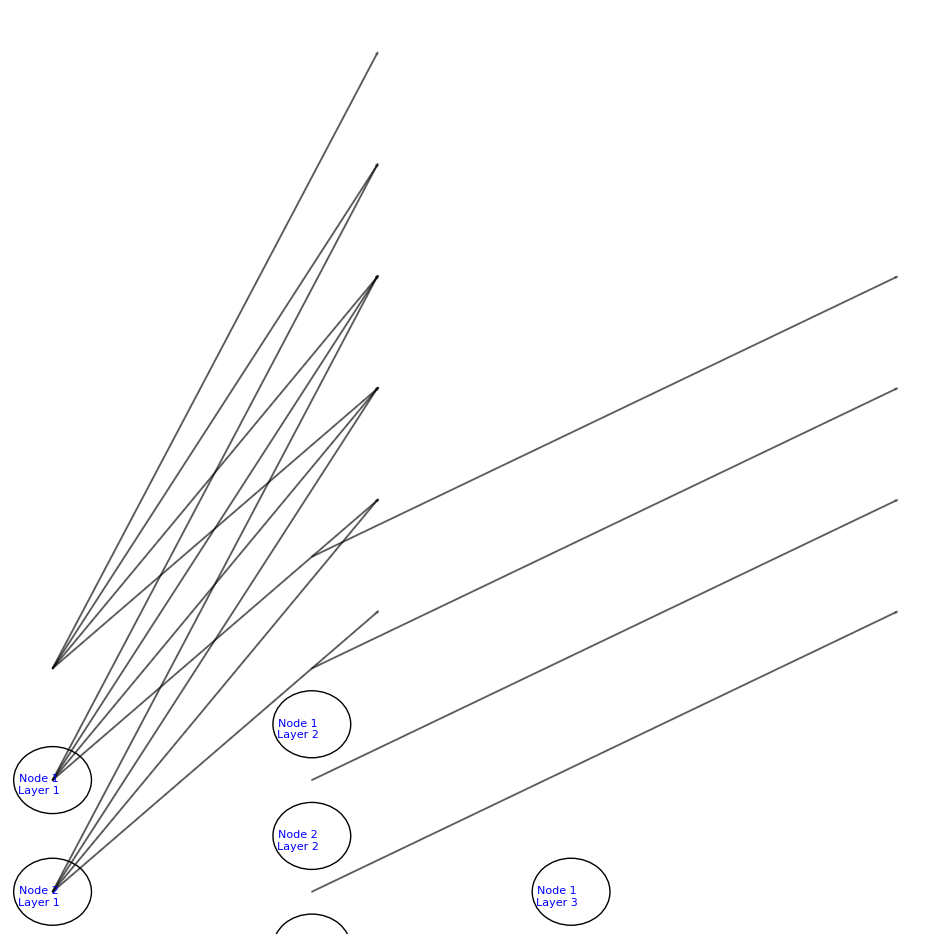

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    Source: https://gist.github.com/craffel/2d727968c3aaebd10359
    '''

    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for i, layer_size in enumerate(layer_sizes):
        y = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for j in range(layer_size):
            ax.add_artist(plt.Circle((i*h_spacing + left, y - j*v_spacing), 0.06, color='w', ec='k'))
            ax.annotate(f'Node {j+1}\nLayer {i+1}', (i*h_spacing + left, y - j*v_spacing),
                        textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='b')

    # Edges
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                ax.arrow(i*h_spacing + left, (v_spacing*j) + (top + bottom)/2., (i + 1)*h_spacing + left,
                         (v_spacing*k) + (top + bottom)/2., color='k', alpha=0.5)

# Define the architecture of your MLP (number of nodes in each layer)
layer_sizes = [3, 4, 1]  # Change this according to your architecture

# Set up the plot
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Draw the neural network
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)

# Show the plot
plt.show()

 Multinomial Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9174311926605505
Recall score: 0.9389671361502347
F1 score: 0.9280742459396751


 Bernoulli Naive Bayes




In [17]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 1.0
Recall score: 0.8732394366197183
F1 score: 0.9323308270676691


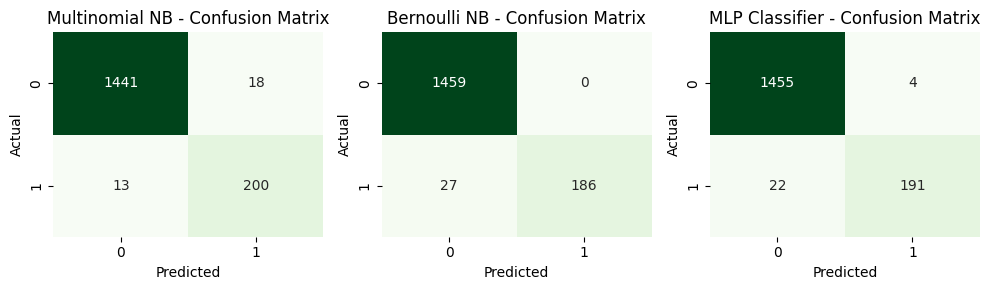

In [18]:
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

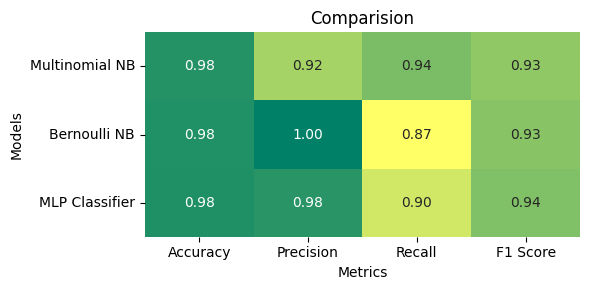

In [19]:
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Comparision")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

In [23]:
input=["Hey i am John.You can't see me","Please reply broo"]
output=count.transform(input)
print(output)

  (0, 1054)	1
  (0, 1839)	1
  (0, 3841)	1
  (0, 4309)	1
  (0, 4939)	1
  (0, 6695)	1
  (0, 8609)	1
  (1, 5879)	1
  (1, 6399)	1
